## Import des librairies

In [81]:
import numpy as np
import glob as gb
import pandas as pd
import cv2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from PIL import Image

import matplotlib.pyplot as plt

In [82]:
val = 0
classes ={}
trainpath = '../data/train' 
for folder in  os.listdir(trainpath) : 
    classes[folder] = val
    val = val+1
#fonction getclasses
def getclasses(n):
    for x , y in classes.items() : 
        if n == y : 
            return x

print(classes)

{'apple': 0, 'baby': 1, 'bear': 2, 'bicycle': 3, 'boy': 4, 'bridge': 5, 'bus': 6, 'crocodile': 7, 'elephant': 8, 'forest': 9}


In [83]:
# train folder
trainpath = '../data/train' 
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( path +'/' + folder + '/*.png'))
    print(f'For data , found {len(files)} in folder {folder}')

For data , found 100 in folder apple
For data , found 100 in folder baby
For data , found 100 in folder bear
For data , found 100 in folder bicycle
For data , found 100 in folder boy
For data , found 100 in folder bridge
For data , found 100 in folder bus
For data , found 100 in folder crocodile
For data , found 100 in folder elephant
For data , found 100 in folder forest


In [84]:
# test folder 
testpath = '../data/test' 
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str( path +'/' + folder + '/*.png'))
    print(f'For data , found {len(files)} in folder {folder}')

For data , found 100 in folder apple
For data , found 100 in folder baby
For data , found 100 in folder bear
For data , found 100 in folder bicycle
For data , found 100 in folder boy
For data , found 100 in folder bridge
For data , found 100 in folder bus
For data , found 100 in folder crocodile
For data , found 100 in folder elephant
For data , found 100 in folder forest


In [85]:
# prediction folder
predictpath = '../data/prediction' 
files = gb.glob(pathname= str( predictpath +'/*.png'))
print(f'For Prediction data , found {len(files)}')
   


For Prediction data , found 54


## checking images

In [86]:
# train folder
size_train = []
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath +'/' + folder + '/*.png'))
    for file in files: 
        image = plt.imread(file)
        size_train.append(image.shape)
pd.Series(size_train).value_counts()

(32, 32, 3)    5000
dtype: int64

In [87]:
# validation folder
size_test = []
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str( testpath +'/' + folder + '/*.png'))
    for file in files: 
        image = plt.imread(file)
        size_test.append(image.shape)
pd.Series(size_test).value_counts()

(32, 32, 3)    1000
dtype: int64

In [88]:
# prediction folder
size_predict = []
files = gb.glob(pathname= str( predictpath +'/*.png'))
for file in files: 
    image = plt.imread(file)
    size_predict.append(image.shape)
pd.Series(size_predict).value_counts()

(32, 32, 3)    54
dtype: int64

## Reading images

In [89]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath +'/' + folder + '/*.png'))
    for file in files: 
        image = cv2.imread(file)
        X_train.append(list(image))
        y_train.append(classes[folder])

In [90]:
print(f'we have {len(X_train)} items in X_train')

we have 5000 items in X_train


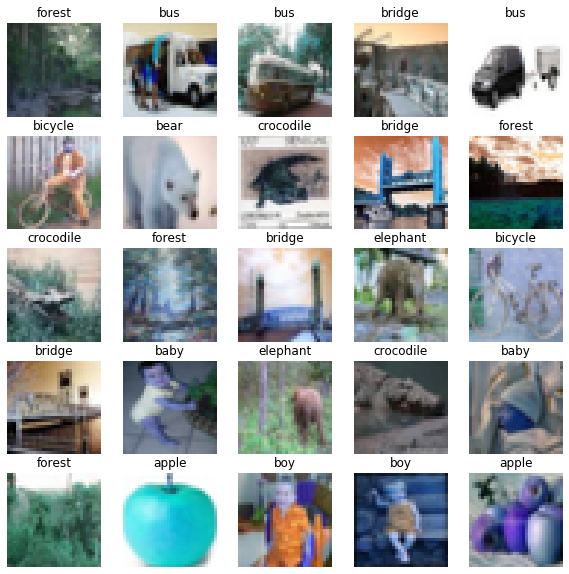

In [91]:
plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(X_train),25))) : 
    plt.subplot(5,5,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getclasses(y_train[i]))

In [92]:
# validation images
X_test = []
y_test = []
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str( testpath +'/' + folder + '/*.png'))
    for file in files: 
        image1 = cv2.imread(file)
        X_test.append(list(image1))
        y_test.append(classes[folder])

In [26]:
print(f'we have {len(X_test)} items in X_test')

we have 400 items in X_test


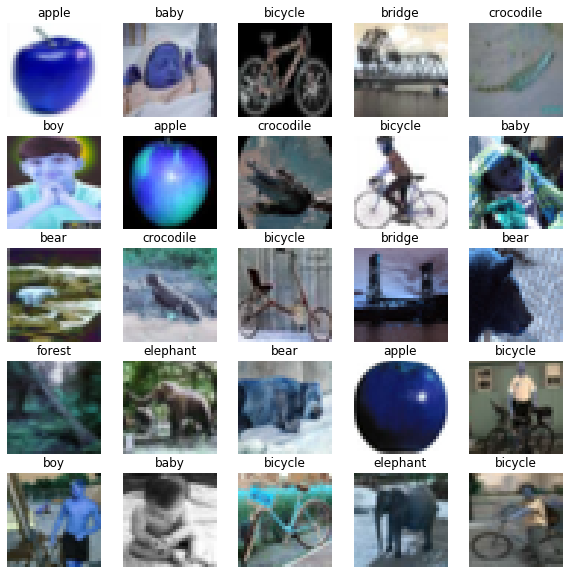

In [93]:
plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(X_test),25))) : 
    plt.subplot(5,5,n+1)
    plt.imshow(X_test[i])   
    plt.axis('off')
    plt.title(getclasses(y_test[i]))

In [94]:
# prediction images
X_pred = []
files = gb.glob(pathname= str( predictpath +'/*.png'))
for file in files: 
    image_array = cv2.imread(file)
    X_pred.append(list(image_array))

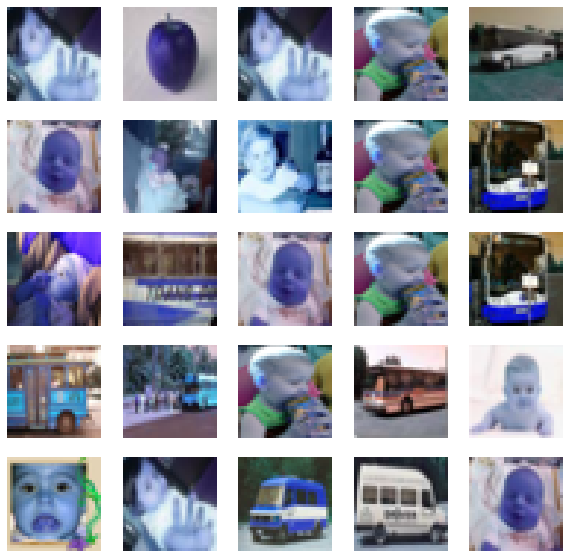

In [95]:
plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),25))) : 
    plt.subplot(5,5,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

## Building the model


In [27]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')

X_train shape  is (2000, 32, 32, 3)
X_test shape  is (400, 32, 32, 3)


In [28]:
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

y_train shape  is (2000,)
y_test shape  is (400,)


In [56]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(32,32,3)))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))

model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

model_cnn.summary()




Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 72)        41544     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 72)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 516       
Total params: 633,804
Trainable params: 633,804
Non-trainable params: 0
________________________________________________

In [77]:
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
training = model_cnn.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))
#model_loss, model_accuracy = model_1.evaluate(X_test, y_test)

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {'(<class \'list\'> containing values of types {"<class \'numpy.ndarray\'>"})'}), (<class 'list'> containing values of types {"<class 'int'>"})

In [55]:
model_loss, model_accuracy = model_cnn.evaluate(X_test, y_test)

13/13 [==============================] - 0s 33ms/step - loss: 0.9981 - accuracy: 0.7725


In [71]:
plt.plot(training.history['loss'], color='red', label='Training loss')
plt.plot(training.history['val_loss'],  color='green', label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

KeyError: 'val_loss'

In [ ]:
y_pred = model_cnn.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

In [ ]:
model.save('model.h5')